# Put Call Parity for DAX Options - Practice Project I // CPF

In [11]:
from pylab import plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-v0_8')
%matplotlib inline

import requests
import cufflinks
import pandas as pd
from io import StringIO
from eod import EodHistoricalData
cufflinks.set_config_file(offline=True)

import warnings
warnings.simplefilter('ignore')

from BSM_ImplVolas import call_option

In [13]:
df = pd.read_csv('Put_Call_Parity_DAX.csv', index_col=0).dropna()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Call_Premium'] = df['Call Premium']
df['Put_Call_Parity'] = df['Put Call Parity']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0.0 to 20.0
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   STRIKE_PRC          21 non-null     float64       
 1   CF_CLOSE            21 non-null     float64       
 2   IMP_VOLT            21 non-null     float64       
 3   S0                  21 non-null     float64       
 4   Date                21 non-null     datetime64[ns]
 5   TTM                 21 non-null     float64       
 6   Rate                21 non-null     float64       
 7   Sigma               21 non-null     float64       
 8   LN (S/K)            21 non-null     float64       
 9   (r + sigma**2 / 2)  21 non-null     float64       
 10  sigma * sqrt(TTM)   21 non-null     float64       
 11  d1                  21 non-null     float64       
 12  N(-d1)              21 non-null     float64       
 13  d2                  21 non-null     float64       
 1

In [15]:
df.head()

,STRIKE_PRC,CF_CLOSE,IMP_VOLT,S0,Date,TTM,Rate,Sigma,LN (S/K),(r + sigma**2 / 2),...,d2,N(-d2),Put Premium,Delta Premium,Put Call Parity,Call Premium,Imp Vola Call,Delta Premium.1,Call_Premium,Put_Call_Parity
Index,,,,,,,,,,,,,,,,,,,,,
0.0,9850.0,283.1,37.31,10337.02,1970-01-01 00:00:00.000043966,0.1,-0.06,0.37,0.05,0.01,...,0.31,0.38,283.1,0.0,711.31,750.4,37.36,-39.09,750.4,711.31
1.0,9900.0,296.3,36.84,10337.02,1970-01-01 00:00:00.000043966,0.1,-0.06,0.37,0.04,0.01,...,0.27,0.39,296.3,0.0,675.98,713.7,36.87,-37.72,713.7,675.98
2.0,9950.0,310.1,36.37,10337.02,1970-01-01 00:00:00.000043966,0.1,-0.06,0.36,0.04,0.01,...,0.23,0.41,310.1,0.0,641.31,677.5,36.40,-36.19,677.5,641.31
3.0,10000.0,324.7,35.89,10337.02,1970-01-01 00:00:00.000043966,0.1,-0.06,0.36,0.03,0.01,...,0.19,0.42,324.7,0.0,606.79,642.0,35.92,-35.21,642.0,606.79
4.0,10050.0,340.1,35.42,10337.02,1970-01-01 00:00:00.000043966,0.1,-0.06,0.35,0.03,0.01,...,0.15,0.44,340.1,0.0,573.11,607.2,35.45,-34.09,607.2,573.11


In [72]:
# Subplots incl Delta View on Put Option Prices Comparison - Market vs Model (using Put Call Parity)


def plot_put_call_parity(options):
    ''' Plots market put premiums against model implied ones (using put call parity). '''
    mats = sorted(set(options.Date))
    for mat in mats:
        opts = options[options.Date == mat]
        plt.figure(figsize=(8, 6))
        plt.subplot(211)
        plt.ylabel('Option prices')
        plt.plot(opts.STRIKE_PRC, opts.Call_Premium, 'b', label='Market', lw=1.5)
        plt.plot(opts.STRIKE_PRC, opts.Put_Call_Parity, 'ro', label='Put Call Parity')
        plt.legend(loc=0)
        plt.title('Call premiums derived from Put Call Parity via BSM')
        plt.axis([min(opts.STRIKE_PRC) - 50, max(opts.STRIKE_PRC) + 50,
              min(opts.Call_Premium) - 60, max(opts.Call_Premium) + 60])
        plt.subplot(212)
        wi = 5.0
        diffs = opts.Call_Premium.values - opts.Put_Call_Parity.values
        plt.bar(opts.STRIKE_PRC, diffs, width=wi)
        plt.ylabel('Difference')
        ymi = min(diffs) - (max(diffs) - min(diffs)) * 0.5
        yma = max(diffs) + (max(diffs) - min(diffs)) * 0.5
        plt.axis([min(opts.STRIKE_PRC) - 50, max(opts.STRIKE_PRC) + 50, ymi, yma])
        plt.tight_layout()
        plt.savefig('Put_Call_Parity_DAX_BSM.png')

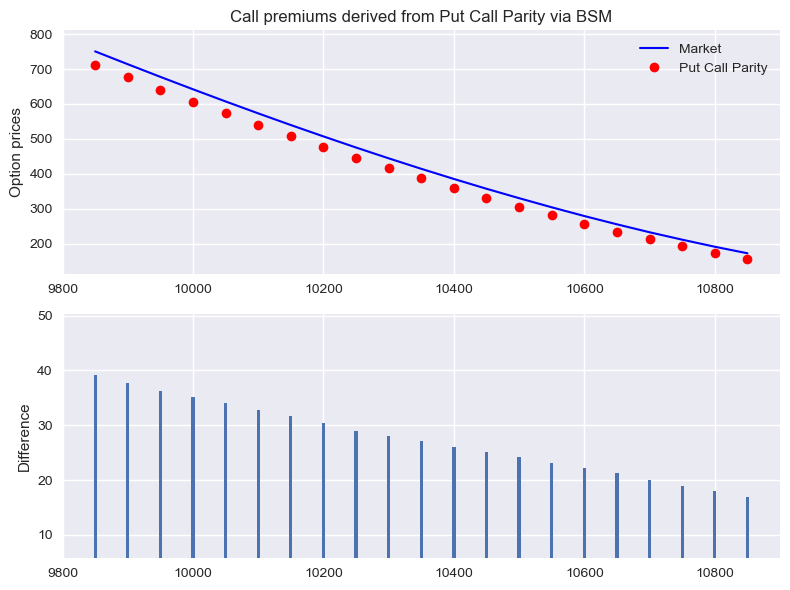

In [74]:
plot_put_call_parity(df)